In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.io import read_image

import torch.nn as nn             # for torch.nn.Module, the parent object for Pytorch models
import torch.nn.functional as F   # for activation function

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [3]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

image_path = "data"
walk_through_dir(image_path)

There are 3 directories and 2 images in 'data'.
There are 0 directories and 150 images in 'data/20_speed'.
There are 0 directories and 150 images in 'data/turn_straight_left'.
There are 0 directories and 540 images in 'data/stop'.


In [28]:
transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

Dataset ImageFolder
    Number of datapoints: 840
    Root location: data
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
class names: ['20_speed', 'stop', 'turn_straight_left'] 

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


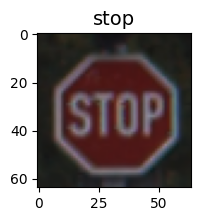

In [44]:
# load data into an ImageFolder
directory = "data"
dataset = datasets.ImageFolder(root=directory,
                               transform=transform)
print(dataset)
class_names = dataset.classes
print("class names:", class_names, "\n")


img, label = dataset[300][0], dataset[300][1]

# Print out different shapes (before and after permute). We permute because matplotlib wants a different image dimension
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img.permute(1,2,0).shape} -> [height, width, color_channels]")

plt.figure(figsize=(2, 2))
plt.title(class_names[label], fontsize=14)
plt.imshow(img.permute(1,2,0))
